In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
all_df = pd.concat([train_df,test_df], sort=False).reset_index(drop=True)

In [4]:
train_df = pd.read_csv("./input/titanic/train.csv")
test_df = pd.read_csv("./input/titanic/test.csv")
all_df = pd.concat([train_df,test_df], sort=False).reset_index(drop=True)

FileNotFoundError: [Errno 2] File ./input/titanic/train.csv does not exist: './input/titanic/train.csv'

In [5]:
all_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

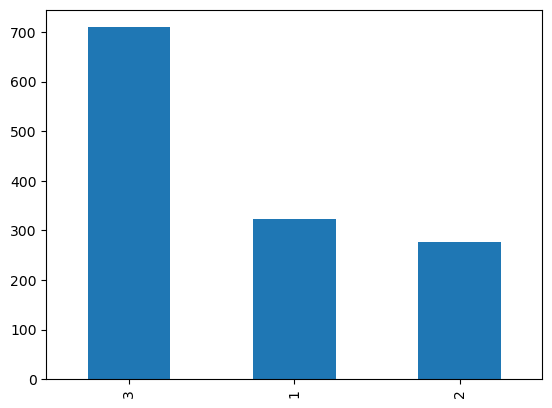

In [6]:
all_df.Pclass.value_counts().plot.bar()

In [7]:
all_df[["Pclass","Fare"]].groupby("Pclass").describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

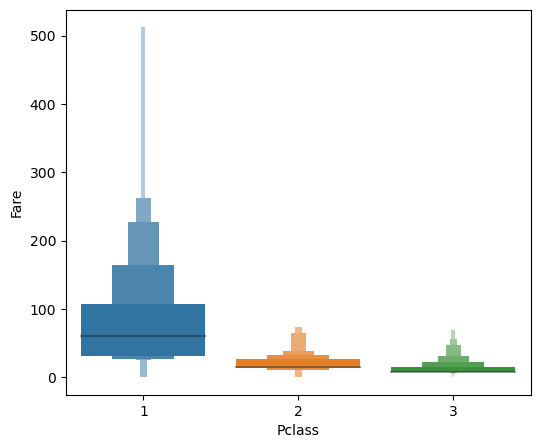

In [8]:
plt.figure(figsize=(6,5))
sns.boxenplot(x="Pclass", y="Fare", data=all_df)

In [9]:
all_df["Pclass2"] = all_df["Pclass"]

In [10]:
all_df.loc[all_df["Fare"]>108, "Pclass2"] = 0

In [11]:
all_df[all_df["Pclass2"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0


In [12]:
all_df[["Pclass2","Age"]].groupby("Pclass2").describe()

Age                                                     
         count       mean        std   min   25%   50%    75%   max
Pclass2                                                            
0         76.0  35.242368  15.422162  0.92  24.0  35.0  45.50  67.0
1        208.0  40.591346  13.981486  4.00  30.0  40.5  50.25  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.00  74.0

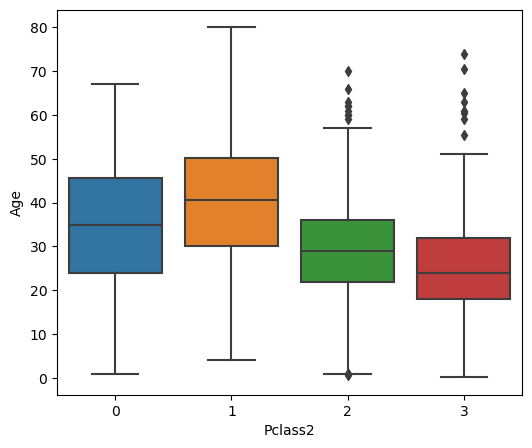

In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2", y="Age", data=all_df)

In [14]:
all_df[all_df["Age"]>15][["Pclass2", "Age"]].groupby("Pclass2").describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Pclass2                                                           
0         69.0  37.920290  13.428357  17.0  27.0  36.0  48.0  67.0
1        207.0  40.768116  13.780416  16.0  30.0  41.0  50.5  80.0
2        233.0  32.369099  11.363367  16.0  24.0  30.0  39.0  70.0
3        422.0  28.200237   9.634512  16.0  21.0  26.0  33.0  74.0

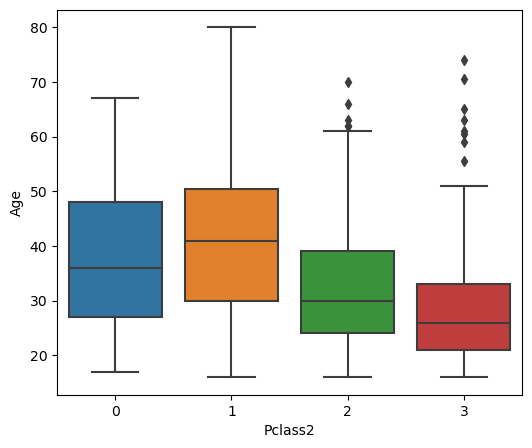

In [15]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Pclass2", y="Age", data=all_df[all_df["Age"]>15])

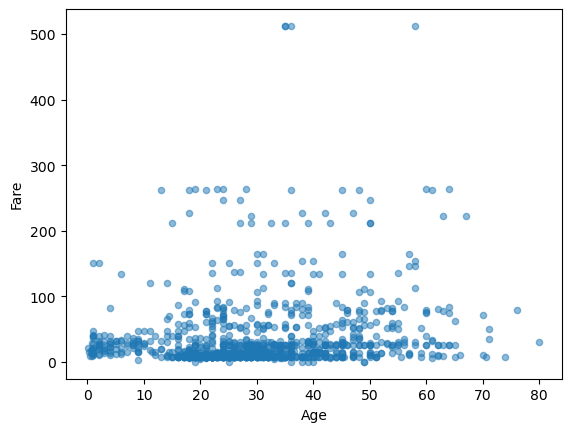

In [16]:
all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)

In [17]:
all_df["family_num"] = all_df["SibSp"] + all_df["Parch"]

In [18]:
all_df[["Pclass2","family_num"]].groupby("Pclass2").describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             81.0  1.543210  1.541504  0.0  0.0  1.0  2.0   5.0
1            242.0  0.553719  0.687172  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

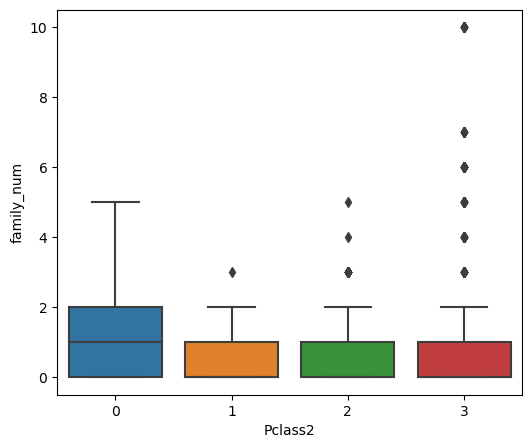

In [19]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Pclass2", y="family_num", data=all_df)

In [20]:
Pclass_gender_df = all_df[["Pclass2", "Sex", "PassengerId"]].dropna().groupby(["Pclass2","Sex"]).count().unstack()

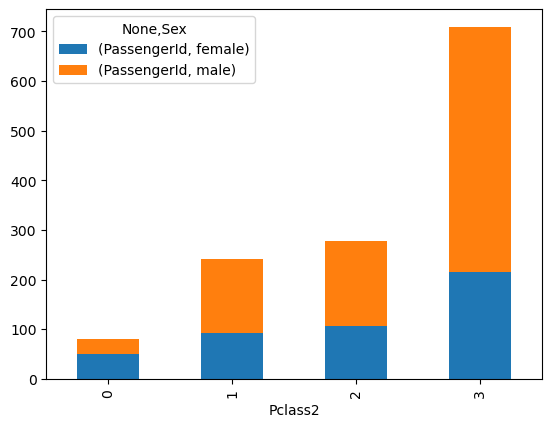

In [21]:
Pclass_gender_df.plot.bar(stacked=True)

In [22]:
Pclass_gender_df["male_ratio"]=Pclass_gender_df["PassengerId", "male"] / (Pclass_gender_df)
["PassengerId", "male"] + Pclass_gender_df["PassengerId", "female"]

ValueError: cannot join with no overlapping index names

In [23]:
Pclass_gender_df

PassengerId     
Sex          female male
Pclass2                 
0                51   30
1                93  149
2               106  171
3               216  493

In [25]:
Pclass_emb_df=all_df[["Pclass2", "Embarked", "PassengrId"]].dropna().groupby(["Pclass2", "Embarked"]).count().unstack()

KeyError: "['PassengrId'] not in index"

In [26]:
Pclass_emb_df = Pclass_emb_df.fillna(0)

NameError: name 'Pclass_emb_df' is not defined

In [40]:
Pclass_emb_df.plot.bar(stacked=True)

NameError: name 'Pclass_emb_df' is not defined

In [41]:
Pclass_emb_df_ratio = Pclass_emb_df.copy()
Pclass_emb_df_ratio["sum"] = Pclass_emb_df_ratio["PassengerId","C"] + Pclass_emb_df_ratio["PassengerId","("] + Pclass_emb_df_ratio["PassengerId","S"]
Pclass_emb_df_ratio["PassengerId","C"] = Pclass_emb_df_ratio["PassengerId","C"] / Pclass_emb_df_ratio["sun"]
Pclass_emb_df_ratio["PassengerId","Q"] = Pclass_emb_df_ratio["PassengerId","Q"] / Pclass_emb_df_ratio["Sum"]
Pclass_emb_df_ratio["PassengerId","S"] = Pclass_emb_df_ratio["PassengerId","S"] / Pclass_enb_df_ratio["sum"]
Pclass_emb_df_ratio = Pclass_emb_df_ratio.drop(["sum"], axis=1)

NameError: name 'Pclass_emb_df' is not defined

In [42]:
Pclass_emb_df_ratio

NameError: name 'Pclass_emb_df_ratio' is not defined

In [48]:
Pclass_emb_df_ratio.plot.bar(stacked=True)

NameError: name 'Pclass_emb_df_ratio' is not defined